In [1]:
from ipynb.fs.full.Models import *
download = False

In [2]:
country='Italy'
j=c_index[country]
j

0

In [3]:
#time params
lock_params = ['t_lock', 'beta_lock']
exp_params = ['alpha']
fermi_params = ['alpha', 't_lock']
rational_params = ['alpha']
time_params = [lock_params,exp_params,fermi_params,rational_params]
time_params

[['t_lock', 'beta_lock'], ['alpha'], ['alpha', 't_lock'], ['alpha']]

In [4]:
sirtypes = [SIR,SIAR,SEIAR]
sirtype_strings = ['SIR','SIAR','SEIAR']

# 4. SIR-type comparison with fixed time dependence and fit configuration
 fix time and weight, change sir type <br>
 --> number of plots = 4 x 4 = 16

In [5]:
#chosen configuration
wprime=(0.0,1.0)
tprime='lock'
mprime=[]

In [6]:
#get params
models=[]
params = []
labels = []
for k,time in enumerate(times):
    for j,weight in enumerate(weights):
        for i, sirtype in enumerate(sirtypes):
            csv = pd.read_csv('params/'+sirtype_strings[i]+'_models.csv', sep=',',index_col=0)
            csv = csv[csv.country==country]

            #select row by time and weights
            row = csv[csv.time==time]
            row = row[row.a==weight[0]]
            row = row[row.r==weight[1]]
            #store initial parameters in params list
            params.append(row.transpose().iloc[7:].dropna().transpose().iloc[0].to_list())
            
            #load models
            mod=Model(country, sirtype, time=time, start=starts[c_index[country]],download=download)
            models.append(mod)
            
            #label
            label = sirtype_strings[i] + ' ' + time + ' ' + str([int(weight[i]) for i in range(2)])
            labels.append(label)
params

Creating SIR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIAR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SEIAR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIAR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SEIAR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIAR 

[[0.5706325985401199,
  0.3791053844985872,
  8.049477956059081e-08,
  45.0,
  0.3422112553005289],
 [0.679824865,
  0.000678725435,
  0.252593794,
  0.675323632,
  0.0483576192,
  1.79490891e-08,
  19.0,
  0.1848208],
 [13.001977231783938,
  0.01558036225269146,
  0.5241960348453665,
  0.08285377321550354,
  0.034272888836065066,
  3.158073806801236e-09,
  29.0,
  3.5319152042569214e-07],
 [0.4358544618843991,
  0.16104426441459674,
  9.94222126160312e-08,
  32.0,
  0.14862668578894367],
 [0.5005024693603821,
  0.5053599955660709,
  0.5372918068908861,
  0.4374938407240849,
  0.15382451014610554,
  1.1477474007861286e-08,
  20.000105878258488,
  0.24223940617544398],
 [192.2426042296881,
  0.014347475431913803,
  0.9991028298828456,
  0.4142173634500013,
  0.1498029674670155,
  3.2120379458137194e-18,
  23.0,
  0.00018813021886256246],
 [0.5470704172028331,
  0.3531801360572772,
  7.847024270965931e-08,
  45.0,
  0.3162504464792739],
 [4.41008748,
  0.0351632939,
  0.446572939,
  4.88

In [7]:
#chosen configuration
wprime=[0.0,1.0]
tprime='lock'

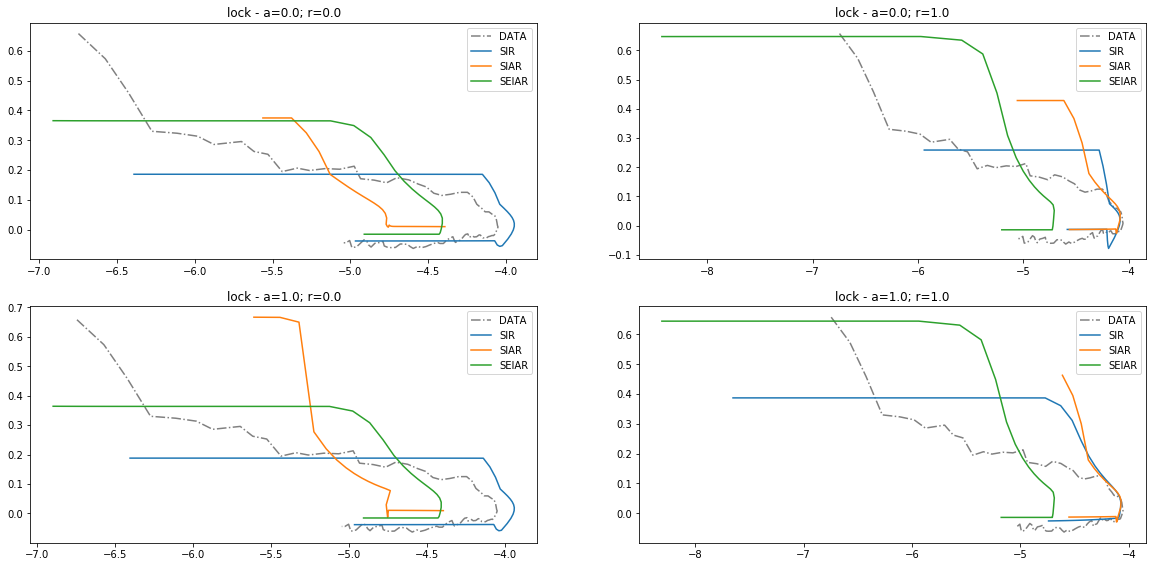

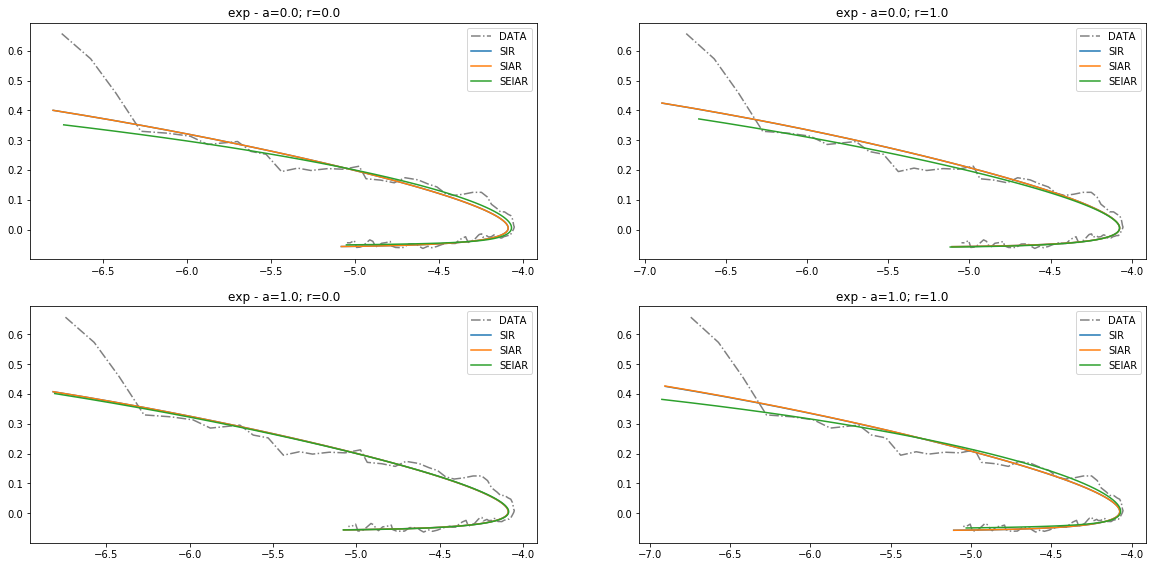

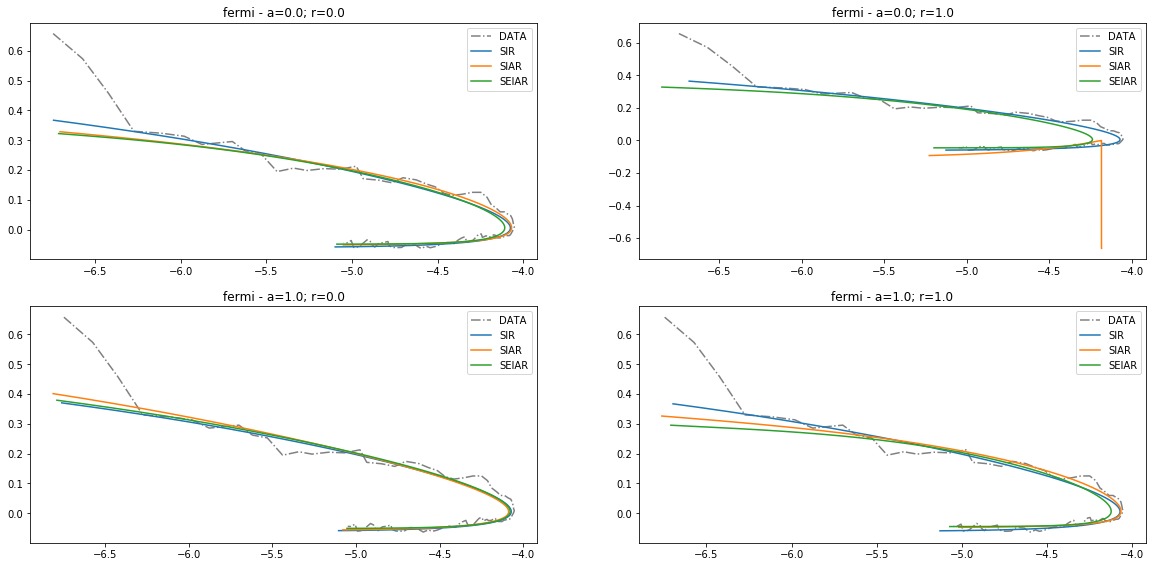

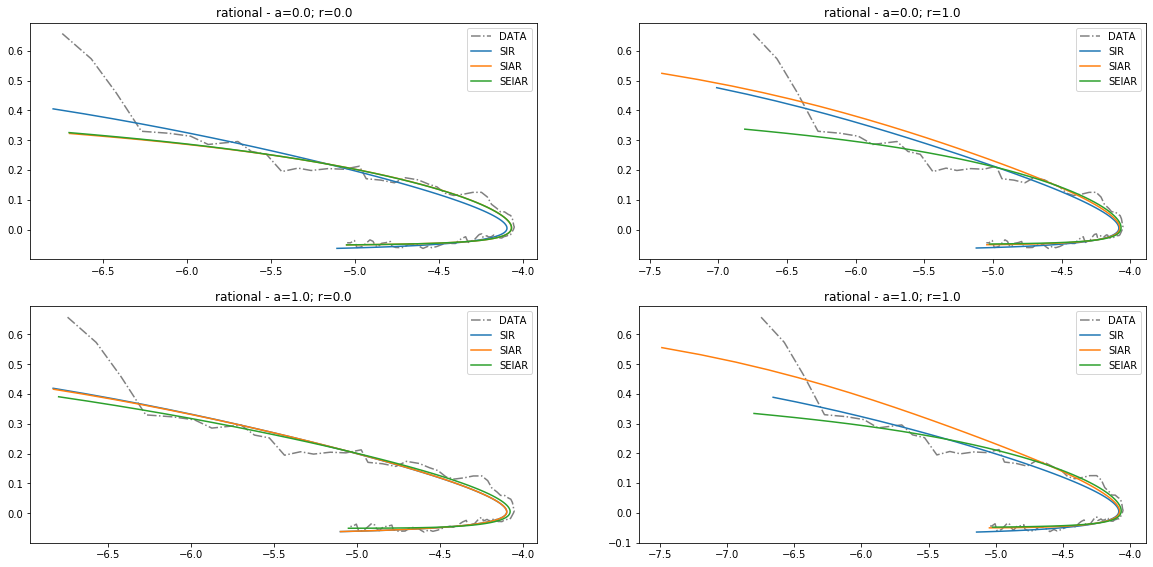

In [8]:
counter=0
for k,time in enumerate(times):
    fig = plt.figure(figsize=(20,20))
    for j,weight in enumerate(weights):
        plt.subplot(4,2,j+1)
        #DATA
        plt.plot(mod.v_data, mod.a_data, color='grey', linestyle='-.', label='DATA')
        
        s=labels[counter]
        title=s.split()[1] + ' - a=' + s.split()[2][1:-1] + '; r=' + s.split()[3][:-1]
        if weight == wprime and time==tprime:
            cprime=counter
        for i, sirtype in enumerate(sirtypes):
            label=labels[counter].split()[0]
            mod = models[counter]
            v_sim, a_sim = mod.predict(params[counter])
            plt.plot(v_sim,a_sim, label=labels[counter].split()[0])
            counter+=1
        plt.legend()
        plt.title(title)
    plt.show()

# FINAL PLOT (0,1) lock
the easiest to compare...

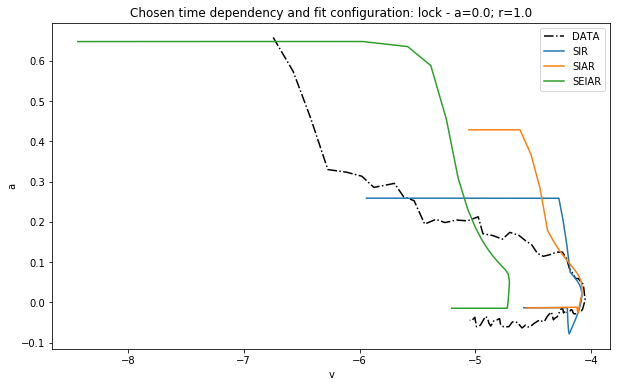

In [23]:
counter=cprime

s=labels[counter]
title=s.split()[1] + ' - a=' + s.split()[2][1:-1] + '; r=' + s.split()[3][:-1]

plt.figure(figsize=(10,6))
plt.plot(mod.v_data, mod.a_data, color='black', linestyle='-.', label='DATA')
for i, sirtype in enumerate(sirtypes):
    label=labels[counter].split()[0]
    mod = models[counter]
    v_sim, a_sim = mod.predict(params[counter])
    plt.plot(v_sim,a_sim, label=labels[counter].split()[0])
    counter+=1
plt.legend()
plt.title('Chosen time dependency and fit configuration: '+ title)
plt.xlabel('v')
plt.ylabel('a')
plt.show()